# Visualization Day1

The exercises for Day 1 are to develop familiarity with the APIs and fluency in the basics of plotting.

# Preamble

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# use seaborn style
sns.set()
sns.set_style('darkgrid')

# Read in data

**SNB Money-market Rate Data**

Data on the money-market rates over various terms, including: overnight (`SARON`), call money rate (`1TGT`), 1, 3, 6, and 12-month CHF-denominated loans (`1M`, `3M0`, `6M`, `12M`, respectively), and USD, JPY, GBP, and EUR-denominated loans (`3M1`, `3M2`, `3M3`, and `3M4`, respectively)

Used in Ex 1 and 2

In [8]:
snb_df = pd.read_csv("../../data/snb-data-zimoma-en-all-20200901_1437.csv", sep=";", skiprows=2)
snb_df = snb_df.rename({'D0': 'Instrument'}, axis=1)
snb_df['Date'] = pd.to_datetime(snb_df['Date'])
snb_df = snb_df.set_index(['Date', 'Instrument']).unstack()['Value']
term_order = ['SARON', '1TGT', '1M', 'EG3M', '3M0', '3M1', '3M2', '3M3', '3M4', '6M', '12M']
snb_df = snb_df[term_order]
snb_df.head()

Instrument,SARON,1TGT,1M,EG3M,3M0,3M1,3M2,3M3,3M4,6M,12M
Date,,,,,,,,,,,
1972-01-01,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-02-01,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-03-01,NaN,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-04-01,NaN,0.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-05-01,NaN,1.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**MPG Data**

Data about a selection of automobiles in two years: 1999 and 2008. Includes information about the manufacturer and model of each car, as well as data on the type of car (`class`), the size of the engine (`displ`, `cyl`), the type of transmission (`trans`), and city and highway fuel efficiency (`cty`, `hwy`) in miles/gallon of fuel units.

Used in Ex 3, 4, 5

In [9]:
mpg_df = pd.read_csv("../../data/mpg.csv")
mpg_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


**Antibiotics Data**

Data on the dosage of `antibiotic` (`mic` or _minimum inhibitory concentration_ in $\mu$g/ml) necessary to kill various `bacteria`, and the `gram`-type of each bacterium. 

Used in Ex 4, 5, 6

In [10]:
antibiotics_df = pd.read_json('../../data/burtin.json', orient='records').set_index(['bacteria', 'gram'])
antibiotics_df = antibiotics_df.stack().reset_index()
# mic = minimum inhibitory concentration
antibiotics_df.columns = ['bacteria', 'gram', 'antibiotic', 'mic']
# assign an id to each bacterium
bid_dict = {b:i for i, b in enumerate(sorted(pd.unique(antibiotics_df['bacteria'])))}
antibiotics_df['bid'] = antibiotics_df.apply(lambda x: bid_dict[x['bacteria']], 1)
# extract the genus of each bacterium
antibiotics_df['genus'] = antibiotics_df['bacteria'].apply(lambda x: x.split(" ")[0])
antibiotics_df.head()

,bacteria,gram,antibiotic,mic,bid,genus
0,Mycobacterium tuberculosis,negative,penicillin,800.0,6,Mycobacterium
1,Mycobacterium tuberculosis,negative,streptomycin,5.0,6,Mycobacterium
2,Mycobacterium tuberculosis,negative,neomycin,2.0,6,Mycobacterium
3,Salmonella schottmuelleri,negative,penicillin,10.0,10,Salmonella
4,Salmonella schottmuelleri,negative,streptomycin,0.8,10,Salmonella


# Basic Plotting

## Ex. 1: Line Chart

A line chart is a standard way of showing the evolution of a variable over time. A line chart can be realized using the `plot` function in pandas or the `plot` function of a matplotlib `ax` or `pyplot` object.

### Ex. 1.1

The snb_df includes a `1TGT` column for of rates for tomorrow-next loans. Plot a line chart of this column.

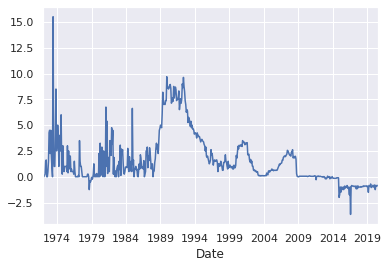

In [11]:
# solution 1 -- using pandas
snb_df['1TGT'].plot();

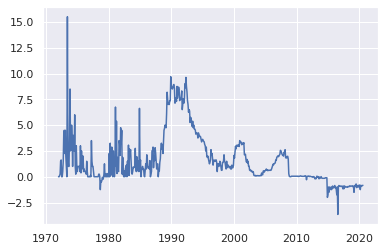

In [12]:
# solution 2 -- using matplotlib directly
plt.plot(snb_df.index, snb_df['1TGT']);

### Ex 1.2

Add a title and y-axis label to the plot from Ex 1.1. The title should be `Swiss Call Money Rate`. The y-axis label should be "Yield (%)".

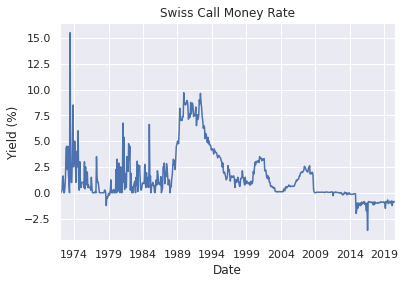

In [13]:
ax = snb_df['1TGT'].plot()
ax.set_title("Swiss Call Money Rate")
ax.set_ylabel("Yield (%)");

## Ex. 2: Bar Chart

A bar chart can also show the evolution of a variable over time. This can be a good option if the data are discrete rather than continous.

A bar plot can be created using the pandas `plot.bar` function or the `bar` function on a matplotlib `ax` or `pyplot` object.

### Ex 2.1

Using the same data is an Ex.1, plot a bar chart of the *average 1TGT rate per year*. Make the figure 10x6 inches.

Step 1, group the data by year and compute the mean.

In [14]:
# add a year column for grouping
tdf = pd.DataFrame(snb_df, copy=True)
tdf['year'] = tdf.index.year
tser = tdf.groupby('year').mean()['1TGT']

Step 2, plot the mean `1TGT` series.

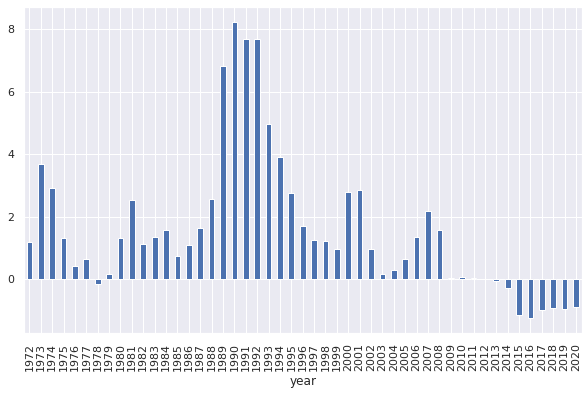

In [15]:
# with pandas
tser.plot.bar(figsize=(10, 6));

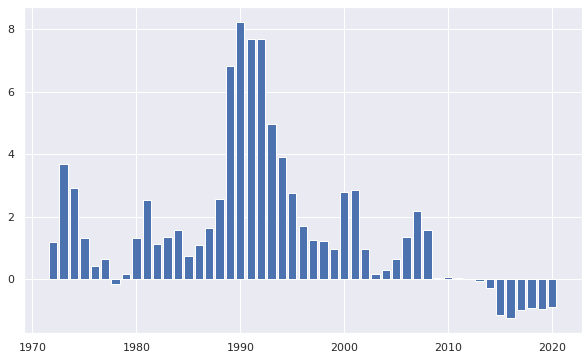

In [36]:
# with matplotlib
tser2 = tdf.groupby('year').mean()['1TGT'].reset_index()
plt.figure(figsize=(10,6))
plt.bar(tser2.iloc[:,0], tser2.iloc[:,1]);

## Ex 2.2

Take the plot from Ex 2.1 and make the following changes:
- Add a title: `Average Swiss Call Money Rate by Year`
- Set the y-axis label to `Yield (%)`.
- Only label every 5th year between 1975 to 2020 (e.g., 1975, 1980, 1985, etc.) on the x-axis. The other years should have no label.

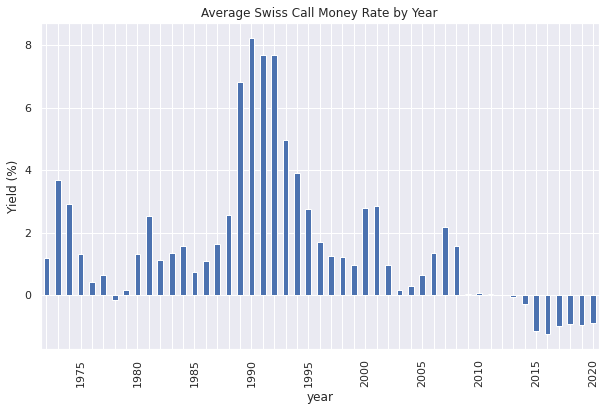

In [37]:
# with pandas
ax = tser.plot.bar(figsize=(10, 6))
labels = [str(year) if (year % 5) == 0 else "" for year in range(1972, 2021)]
ax.set_title("Average Swiss Call Money Rate by Year")
ax.set_ylabel("Yield (%)")
ax.set_xticklabels(labels);

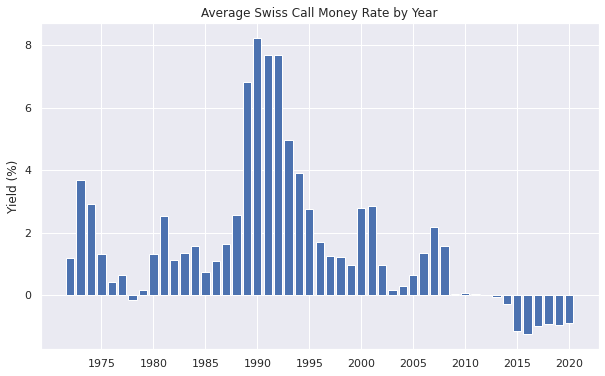

In [86]:
# with matplotlib
tser2 = tdf.groupby('year').mean()['1TGT'].reset_index()
labels2 = [year for year in tser2["year"] if (year % 5)==0 ]
plt.figure(figsize=(10,6))
plt.bar(tser2.iloc[:,0], tser2.iloc[:,1])
plt.title("Average Swiss Call Money Rate by Year")
plt.ylabel("Yield (%)")
plt.xticks(labels2);

## Ex 3: Scatterplot

A scatterplot can be used to show any relationship between two variables.

### Ex 3.1

Using the `mpg_df` dataframe, make a scatterplot with `hwy` on the x-axis and `cty` on the y-axis. Give the plot the title `Highway vs. City Fuel Mileage`, and label the x-axis `Highway` and the y-axis `City`.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


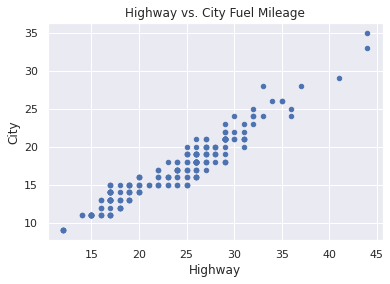

In [87]:
# solution 1: pandas
ax = mpg_df.plot.scatter(x='hwy', y='cty')
ax.set_title("Highway vs. City Fuel Mileage")
ax.set_xlabel('Highway')
ax.set_ylabel('City');

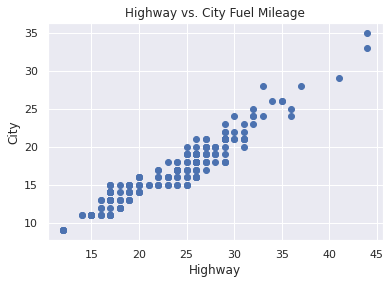

In [88]:
# solution 2: matplotlib
fig, ax = plt.subplots()
ax.scatter(mpg_df['hwy'], mpg_df['cty'])
ax.set_title("Highway vs. City Fuel Mileage")
ax.set_xlabel('Highway')
ax.set_ylabel('City');

### Ex 3.2

As in 3.1 use the `mpg_df` dataframe to make a scatterplot with `hwy` on the x-axis and `cty` on the y-axis.
This time, use different mark shapes for cars from the year 1999 and 2008. For example, draw cars from 1999 as +'s, those from 2008 as x's.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


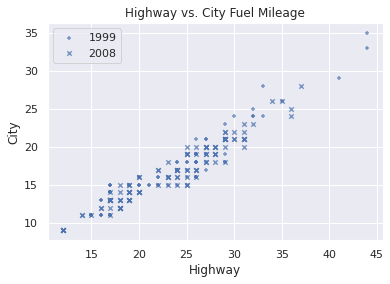

In [89]:
fig, ax = plt.subplots()
markers = ['+', 'x']
for i, (name, gdf) in enumerate(mpg_df.groupby('year')):
    gdf.plot.scatter(x="hwy", y="cty", marker=markers[i], ax=ax, alpha=0.7, label=name)
ax.set_title("Highway vs. City Fuel Mileage")
ax.set_xlabel('Highway')
ax.set_ylabel('City');

### Ex 3.3

As in 3.1 use the `mpg_df` dataframe to make a scatterplot with `hwy` on the x-axis and `cty` on the y-axis, using the default mark shapes (dots).
This time, color all marks representing data from the year 1999 in a different color than those from 2008. Set the `alpha` of the marks to 0.5. Why are some dots neither of the two colors you explicitly selected?

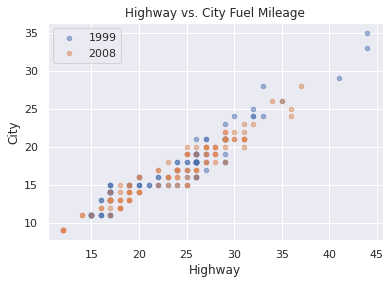

In [90]:
# This can be done with matplotlib or seaborn. Here is the matplotlib solution.
# Some dots are a mixture of blue and orange because cars from both years have that same
#   combination of hwy and cty values.
fig, ax = plt.subplots()
colors = sns.color_palette()
for i, (name, gdf) in enumerate(mpg_df.groupby('year')):
    gdf.plot.scatter(x="hwy", y="cty", color=colors[i], ax=ax, alpha=0.5, label=name)
ax.set_title("Highway vs. City Fuel Mileage")
ax.set_xlabel('Highway')
ax.set_ylabel('City');

### Ex 3.4

As in 3.3 use the `mpg_df` dataframe to make a scatterplot with `hwy` on the x-axis and `cty` on the y-axis. Again, color all marks representing data from the year 1999 in a different color than those from 2008, this time using two colors from the ColorBrewer `Dark2` palette.

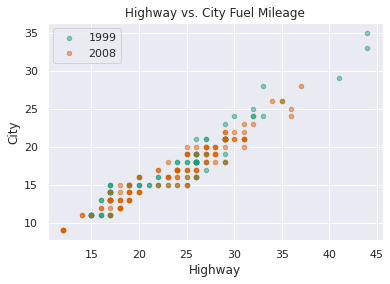

In [91]:
fig, ax = plt.subplots()
colors = sns.color_palette('Dark2')
for i, (name, gdf) in enumerate(mpg_df.groupby('year')):
    gdf.plot.scatter(x="hwy", y="cty", color=colors[i], ax=ax, alpha=0.5, label=name)
ax.set_title("Highway vs. City Fuel Mileage")
ax.set_xlabel('Highway')
ax.set_ylabel('City');

### Ex 3.5
Again, use the `mpg_df` dataframe to make a scatterplot with `hwy` on the x-axis and `cty` on the y-axis.
This time, map the `class` column of the dataframe to color. You will need a palette with seven (7) colors. All `subcompact` cars should be one color, all `compact` cars another color, etc.

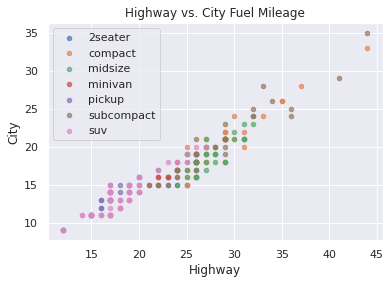

In [92]:
fig, ax = plt.subplots()
colors = sns.color_palette()
for i, (name, gdf) in enumerate(mpg_df.groupby('class')):
    gdf.plot.scatter(x="hwy", y="cty", color=colors[i], ax=ax, alpha=0.7, label=name)
ax.set_title("Highway vs. City Fuel Mileage")
ax.set_xlabel('Highway')
ax.set_ylabel('City');

### Ex 3.6
Make the same plot as in 3.5, but use different mark shapes for cars from the year 1999 vs. 2008. For example, draw cars from 1999 as +'s, those from 2008 as x's.

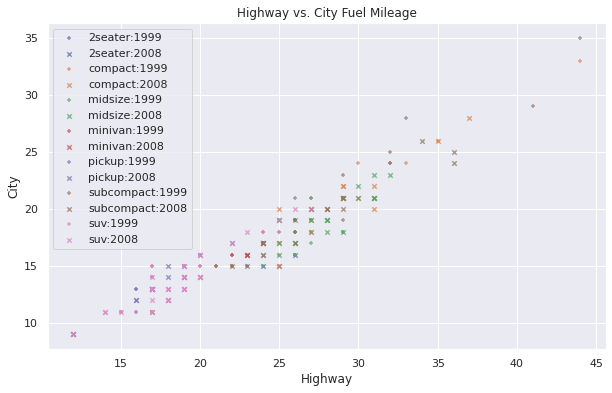

In [93]:
# Solution, though the legend would be better if the color and marker were separated
fig, ax = plt.subplots(figsize=(10, 6))
colors = sns.color_palette()
markers = ['+', 'x']
for i, (name, gdf) in enumerate(mpg_df.groupby('class')):
    for j, (year, ydf) in enumerate(gdf.groupby('year')):
        label = f"{name}:{year}"
        ydf.plot.scatter(x="hwy", y="cty", color=colors[i], marker=markers[j], ax=ax, alpha=0.7, label=label)
ax.set_title("Highway vs. City Fuel Mileage")
ax.set_xlabel('Highway')
ax.set_ylabel('City');

## Ex 4: Heatmap

A heatmap can be used to display three variables of data, two mapped to x and y position of a mark, the third mapped to color. The seaborn `heatmap` function provides an easy to way make heatmaps.

### Ex 4.1

Using the `antibiotics_df` dataframe, make a heatmap with `antibiotic` on the x-axis and `bacteria` on the y-axis, and the `mic` column represented using color. Label the x-axis `Bacterium`, the y-axis `Antibiotic`, and give the entire plot the title `MIC of Antibiotics`.

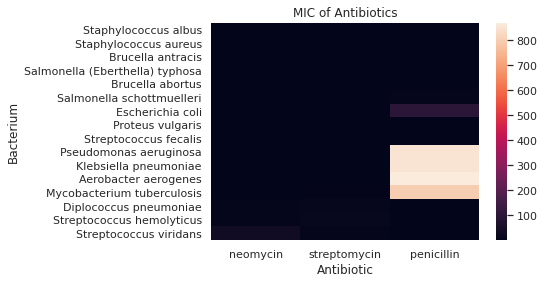

In [94]:
tdf = antibiotics_df[['bacteria', 'antibiotic', 'mic']]
tdf = tdf.set_index(['bacteria', 'antibiotic']).unstack()['mic']
tdf = tdf.sort_values('neomycin')[['neomycin', 'streptomycin', 'penicillin']]
ax = sns.heatmap(tdf)
ax.set_ylabel("Bacterium")
ax.set_xlabel("Antibiotic")
ax.set_title("MIC of Antibiotics");

### Ex 4.2

As in Ex 4.1, use the `antibiotics_df` dataframe to make a heatmap with `antibiotic` on the x-axis and `bacteria` on the y-axis, and the `mic` column represented using color. This time, use a log scale for the `mic` column / color mapping.

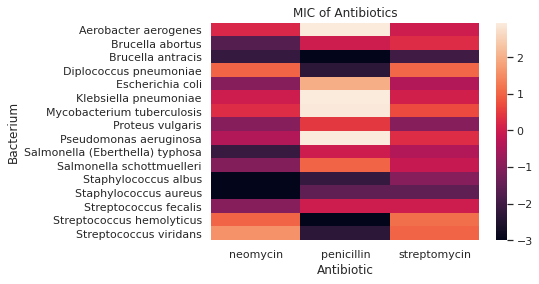

In [95]:
# Solution 1 -- convert mic to log(mic)
# This works, but isn't great because the scale for the colorbar would need to be fixed (not shown here).
tdf = antibiotics_df[['bacteria', 'antibiotic', 'mic']]
tdf = tdf.set_index(['bacteria', 'antibiotic']).unstack()['mic']
tdf = np.log10(tdf)
ax = sns.heatmap(tdf)
ax.set_ylabel("Bacterium")
ax.set_xlabel("Antibiotic")
ax.set_title("MIC of Antibiotics");

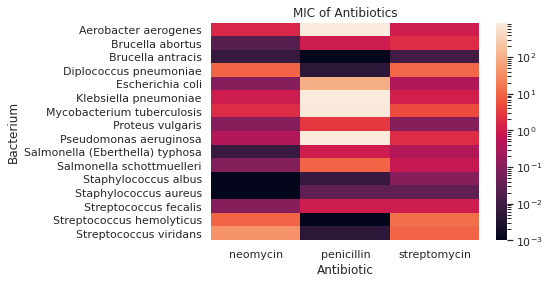

In [96]:
# Solution 2- -- use the norm argument to scale values. This is a better solution.
from matplotlib.colors import LogNorm
tdf = antibiotics_df[['bacteria', 'antibiotic', 'mic']]
tdf = tdf.set_index(['bacteria', 'antibiotic']).unstack()['mic']
ax = sns.heatmap(tdf, norm=LogNorm())
ax.set_ylabel("Bacterium")
ax.set_xlabel("Antibiotic")
ax.set_title("MIC of Antibiotics");

## Ex 5: Transforms

Data transformations can make a chart easier to understand and are necessary to even be able to present the data in some cases.

### Ex 5.1

Using the `antibiotics_df` dataframe, plot the `mic` column for `penicillin` as a bar chart. Sort the values in descending order to make visualization easier to interpret.

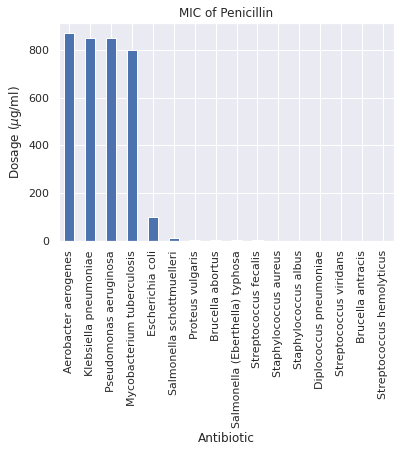

In [97]:
tdf = antibiotics_df[['bacteria', 'antibiotic', 'mic']]
tdf = tdf.set_index(['bacteria', 'antibiotic']).unstack()['mic']
ser = tdf['penicillin'].sort_values(ascending=False)
ax = ser.plot.bar()
ax.set_ylabel('Dosage ($\mu$g/ml)')
ax.set_xlabel("Antibiotic")
ax.set_title("MIC of Penicillin");

### Ex 5.2

Make the same visualization as in 5.1, but use a log scale for the y-axis.

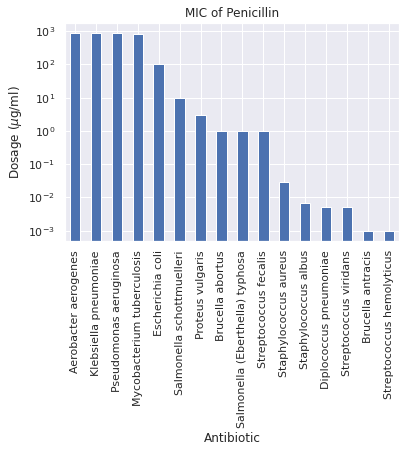

In [98]:
tdf = antibiotics_df[['bacteria', 'antibiotic', 'mic']]
tdf = tdf.set_index(['bacteria', 'antibiotic']).unstack()['mic']
ser = tdf['penicillin'].sort_values(ascending=False)
ax = ser.plot.bar(logy=True)
ax.set_ylabel('Dosage ($\mu$g/ml)')
ax.set_xlabel("Antibiotic")
ax.set_title("MIC of Penicillin");

### Ex 5.3

Make the same visualization as in 5.2, but invert the y-axis so it goes from 1000 to 0.001, where the shortest bars represent a dosage of 1000 $\mu$g/ml. What is an appropriate label for the y-axis?

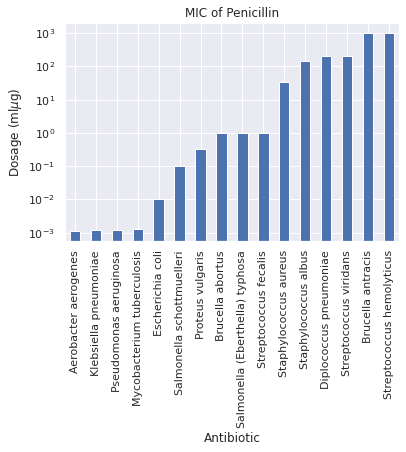

In [99]:
# Solution 1 -- invert the values and the units in the label
tdf = antibiotics_df[['bacteria', 'antibiotic', 'mic']]
tdf = tdf.set_index(['bacteria', 'antibiotic']).unstack()['mic']
ser = 1 / tdf['penicillin'].sort_values(ascending=False)
ax = ser.plot.bar(logy=True)
ax.set_ylabel('Dosage (ml$\mu$g)')
ax.set_xlabel("Antibiotic")
ax.set_title("MIC of Penicillin");

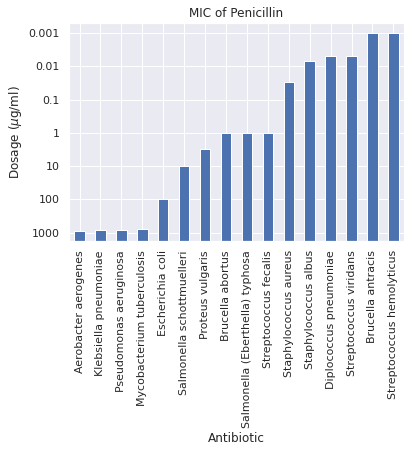

In [100]:
# Solution 2 -- leave units unchanged, but change the tick labels
tdf = antibiotics_df[['bacteria', 'antibiotic', 'mic']]
tdf = tdf.set_index(['bacteria', 'antibiotic']).unstack()['mic']
ser = 1 / tdf['penicillin'].sort_values(ascending=False)
ax = ser.plot.bar(logy=True)
ax.set_ylabel('Dosage ($\mu$g/ml)')
ticks = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
ax.set_yticks(ticks)
labels = ticks.copy()
labels.reverse()
ax.set_yticklabels(labels)
ax.set_xlabel("Antibiotic")
ax.set_title("MIC of Penicillin");

### Ex 5.4

Take the solution from 5.3, but additionally color the gram positive bacteria differently from the gram negative bacteria.

Step 1, create a data frame that contains the MIC of penicillin and the gram of each bacterium

In [101]:
tdf = antibiotics_df[['antibiotic', 'bacteria', 'mic', 'gram']]
tdf = tdf.set_index(['bacteria', 'antibiotic', 'gram'])
tdf = tdf.loc[(slice(None), 'penicillin'), :]
tdf = tdf.reset_index()
tdf = tdf.sort_values("mic", ascending=False)
tdf['mic_inv'] = 1 / tdf['mic']

Step 2, plot

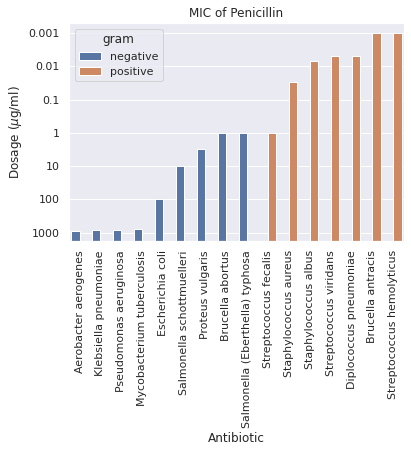

In [102]:
ax = sns.barplot(x="bacteria", y="mic_inv", hue="gram", log=True, data=tdf)
ax.set_ylabel('Dosage ($\mu$g/ml)')
ticks = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
ax.set_yticks(ticks)
labels = ticks.copy()
labels.reverse()
ax.set_yticklabels(labels)
ax.set_xlabel("Antibiotic")
ax.set_title("MIC of Penicillin")
plt.xticks(rotation="90");

## Ex 6: Sort

### Ex 6.1

Redo the heatmap from 4.2, this time sort the rows by dosage of `neomycin` in ascending order. This will structure and make it easier to interpret the plot.

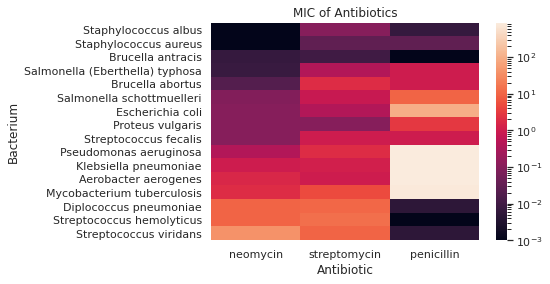

In [105]:
from matplotlib.colors import LogNorm
tdf = antibiotics_df[['bacteria', 'antibiotic', 'mic']]
tdf = tdf.set_index(['bacteria', 'antibiotic']).unstack()['mic']
tdf = tdf.sort_values('neomycin')[['neomycin', 'streptomycin', 'penicillin']]
ax = sns.heatmap(tdf, norm=LogNorm())
ax.set_ylabel("Bacterium")
ax.set_xlabel("Antibiotic")
ax.set_title("MIC of Antibiotics");